In [5]:
import pandas as pd
from sklearn.datasets import load_iris

print("Hi")

In [6]:
iris=load_iris() # This is a Bunch objects like a arrays in arrays so we need to convert into a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(10)
print(len(df))

150


In [7]:
df.isnull().sum() # Check for null values
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [8]:
print(df['target'].value_counts())

target
0    50
1    50
2    50
Name: count, dtype: int64


In [9]:
X = df[iris.feature_names] # input features
Y=df['target'] # output classification

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
print("Trainning Samples",len(X_train))
print("Testing Samples",len(X_test))

Trainning Samples 120
Testing Samples 30


In [11]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import numpy as np

clf=DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=3,random_state=42)
clf.fit(X_train,Y_train) # trainning the model
Y_pred=clf.predict(X_test) #predict the output
accuracy=accuracy_score(Y_test,Y_pred)


In [12]:
# evaluation
print("Accuracy",accuracy)
print("confusion_matrix\n",confusion_matrix(Y_test,Y_pred))
print("classification_report\n",classification_report(Y_test,Y_pred))



Accuracy 1.0
confusion_matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




Feature importances (descending):
petal length (cm)    0.906143
petal width (cm)     0.077186
sepal width (cm)     0.016670
sepal length (cm)    0.000000
dtype: float64


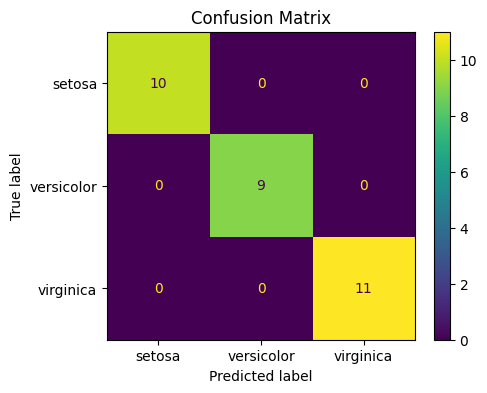

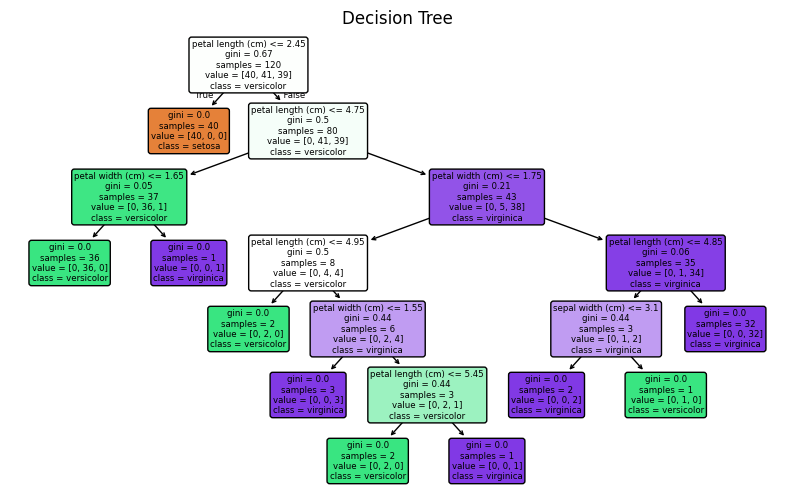

In [15]:
cm = confusion_matrix(Y_test, Y_pred)

feat_importances = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
print("\nFeature importances (descending):")
print(feat_importances)

# --- visualize confusion matrix (plot) ---
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(5,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(ax=ax, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# --- visualize tree ---
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, precision=2)
plt.title("Decision Tree")
plt.show()

In [17]:
#to select the the heperparameters use GridSearchCV 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 3, 5]
}

# this one will run all the combinations of the hyperaparameters and select the best one based on cross-validation score
#2*5*3=30 combinations

grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy')
#cv= cross validation 5 times
grid_search.fit(X_train,Y_train)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Test on unseen data
Y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred))



Best Cross-Validation Accuracy: 0.9416666666666668
Test Accuracy: 1.0
